## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 5s 97us/step - loss: 1.4426 - accuracy: 0.4981 - val_loss: 1.6290 - val_accuracy: 0.4306
Epoch 50/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.4426 - accuracy: 0.4952 - val_loss: 1.6589 - val_accuracy: 0.4280
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.4344 - accuracy: 0.8425 - val_loss: 2.0878 - val_accuracy: 0.5275
Epoch 48/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.4121 - accuracy: 0.8507 - val_loss: 2.2094 - val_accuracy: 0.5137
Epoch 49/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.3952 - accuracy: 0.8590 - val_loss: 2.2064 - val_accuracy: 0.5180
Epoch 50/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.3733 - accuracy: 0.8655 - val_loss: 2.2435 - val_accuracy: 0.5258
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_____________________________

Epoch 45/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.9201 - accuracy: 0.6772 - val_loss: 1.3587 - val_accuracy: 0.5366
Epoch 46/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9090 - accuracy: 0.6801 - val_loss: 1.4130 - val_accuracy: 0.5141
Epoch 47/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.9039 - accuracy: 0.6837 - val_loss: 1.4315 - val_accuracy: 0.5237
Epoch 48/50
50000/50000 [==============================] - 5s 101us/step - loss: 0.8930 - accuracy: 0.6904 - val_loss: 1.4980 - val_accuracy: 0.5021
Epoch 49/50
50000/50000 [==============================] - 5s 91us/step - loss: 0.8795 - accuracy: 0.6916 - val_loss: 1.4707 - val_accuracy: 0.5094
Epoch 50/50
50000/50000 [==============================] - 5s 90us/step - loss: 0.8691 - accuracy: 0.6971 - val_loss: 1.3807 - val_accuracy: 0.5368
Experiment with LR = 0.000100
Model: "model_1"
________________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5865 - accuracy: 0.4466 - val_loss: 1.5963 - val_accuracy: 0.4410
Epoch 44/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5817 - accuracy: 0.4482 - val_loss: 1.5924 - val_accuracy: 0.4419
Epoch 45/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5773 - accuracy: 0.4504 - val_loss: 1.5895 - val_accuracy: 0.4436
Epoch 46/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5729 - accuracy: 0.4512 - val_loss: 1.5866 - val_accuracy: 0.4457
Epoch 47/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5683 - accuracy: 0.4532 - val_loss: 1.5821 - val_accuracy: 0.4419
Epoch 48/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.5637 - accuracy: 0.4544 - val_loss: 1.5773 - val_accuracy: 0.4465
Epoch 49/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5596 - accuracy: 0.4562

Epoch 41/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.9389 - accuracy: 0.3287 - val_loss: 1.9372 - val_accuracy: 0.3261
Epoch 42/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.9350 - accuracy: 0.3300 - val_loss: 1.9336 - val_accuracy: 0.3291
Epoch 43/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.9314 - accuracy: 0.3321 - val_loss: 1.9299 - val_accuracy: 0.3292
Epoch 44/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.9277 - accuracy: 0.3331 - val_loss: 1.9264 - val_accuracy: 0.3310
Epoch 45/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.9242 - accuracy: 0.3333 - val_loss: 1.9232 - val_accuracy: 0.3320
Epoch 46/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9208 - accuracy: 0.3348 - val_loss: 1.9198 - val_accuracy: 0.3346
Epoch 47/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.9174 - accuracy: 0.3363

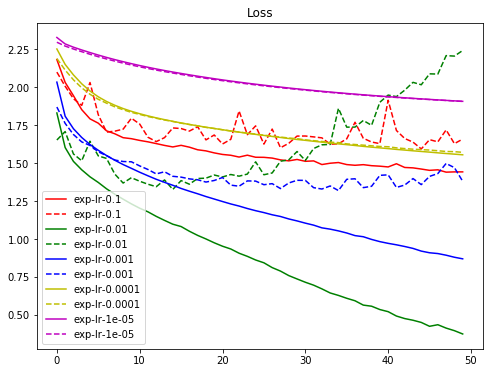

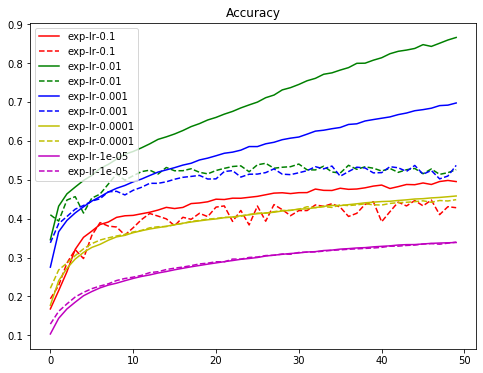

In [9]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.2974 - accuracy: 0.1014 - val_loss: 2.2571 - val_accuracy: 0.1226
Epoch 50/50
50000/50000 [==============================] - 5s 109us/step - loss: 2.2902 - accuracy: 0.1067 - val_loss: 2.2928 - val_accuracy: 0.1054
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.6562 - accuracy: 0.7641 - val_loss: 1.7270 - val_accuracy: 0.5260
Epoch 48/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.6585 - accuracy: 0.7611 - val_loss: 1.7231 - val_accuracy: 0.5201
Epoch 49/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.6346 - accuracy: 0.7707 - val_loss: 1.7598 - val_accuracy: 0.5211
Epoch 50/50
50000/50000 [==============================] - 5s 102us/step - loss: 0.6141 - accuracy: 0.7791 - val_loss: 1.7834 - val_accuracy: 0.5182
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.0044 - accuracy: 0.6466 - val_loss: 1.3355 - val_accuracy: 0.5311
Epoch 46/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.9763 - accuracy: 0.6565 - val_loss: 1.3730 - val_accuracy: 0.5216
Epoch 47/50
50000/50000 [==============================] - 4s 84us/step - loss: 0.9775 - accuracy: 0.6563 - val_loss: 1.3491 - val_accuracy: 0.5288
Epoch 48/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.9761 - accuracy: 0.6576 - val_loss: 1.3339 - val_accuracy: 0.5369
Epoch 49/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.9472 - accuracy: 0.6678 - val_loss: 1.3166 - val_accuracy: 0.5429
Epoch 50/50
50000/50000 [==============================] - 4s 83us/step - loss: 0.9371 - accuracy: 0.6711 - val_loss: 1.3254 - val_accuracy: 0.5377
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5930 - accuracy: 0.4434 - val_loss: 1.6010 - val_accuracy: 0.4378
Epoch 44/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5879 - accuracy: 0.4450 - val_loss: 1.5971 - val_accuracy: 0.4397
Epoch 45/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5831 - accuracy: 0.4459 - val_loss: 1.5967 - val_accuracy: 0.4390
Epoch 46/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.5806 - accuracy: 0.4476 - val_loss: 1.5887 - val_accuracy: 0.4435
Epoch 47/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.5762 - accuracy: 0.4479 - val_loss: 1.5851 - val_accuracy: 0.4428
Epoch 48/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5705 - accuracy: 0.4497 - val_loss: 1.5819 - val_accuracy: 0.4431
Epoch 49/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.5661 - accuracy: 0.4527 - val_

Epoch 41/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9832 - accuracy: 0.3087 - val_loss: 1.9811 - val_accuracy: 0.3100
Epoch 42/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.9792 - accuracy: 0.3106 - val_loss: 1.9772 - val_accuracy: 0.3119
Epoch 43/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.9753 - accuracy: 0.3125 - val_loss: 1.9734 - val_accuracy: 0.3132
Epoch 44/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9716 - accuracy: 0.3132 - val_loss: 1.9697 - val_accuracy: 0.3143
Epoch 45/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9680 - accuracy: 0.3152 - val_loss: 1.9661 - val_accuracy: 0.3160
Epoch 46/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9643 - accuracy: 0.3159 - val_loss: 1.9627 - val_accuracy: 0.3165
Epoch 47/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.9608 - accuracy: 0.3176 - val_

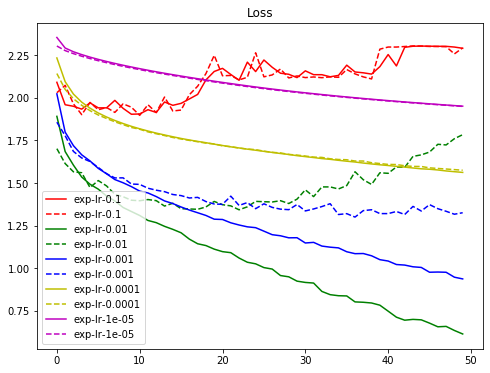

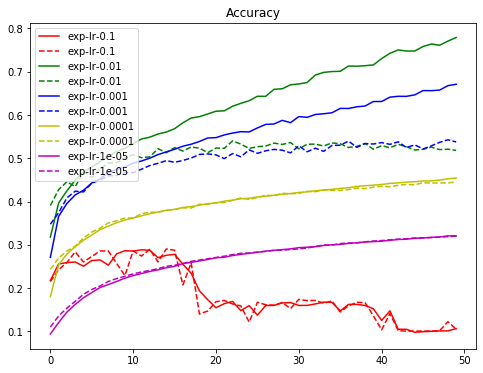

In [10]:

import matplotlib.pyplot as plt
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()